
    T       y[ 0 ]        y[ 1 ]        y[ 2 ]        y[ 3 ]   
   0.0000e+00    0.0000e+00    6.9282e+01    0.0000e+00    4.0000e+01 
   1.0000e-01    6.7583e+00    6.5922e+01    3.9649e+00    3.9308e+01 
   2.0000e-01    1.3192e+01    6.2783e+01    7.8635e+00    3.8672e+01 
   3.0000e-01    1.9321e+01    5.9841e+01    1.1701e+01    3.8084e+01 
   4.0000e-01    2.5166e+01    5.7074e+01    1.5482e+01    3.7540e+01 
   5.0000e-01    3.0741e+01    5.4465e+01    1.9210e+01    3.7035e+01 
   6.0000e-01    3.6064e+01    5.1999e+01    2.2890e+01    3.6566e+01 
   7.0000e-01    4.1146e+01    4.9661e+01    2.6524e+01    3.6130e+01 
   8.0000e-01    4.6000e+01    4.7440e+01    3.0117e+01    3.5723e+01 
   9.0000e-01    5.0637e+01    4.5325e+01    3.3670e+01    3.5343e+01 
   1.0000e+00    5.5068e+01    4.3306e+01    3.7186e+01    3.4988e+01 
   1.1000e+00    5.9301e+01    4.1376e+01    4.0668e+01    3.4656e+01 
   1.2000e+00    6.3346e+01    3.9526e+01    4.4118e+01    3.4344e+01 
   1.3000e+0

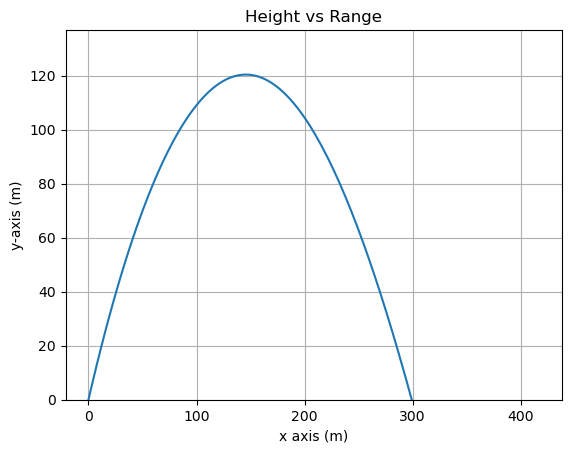

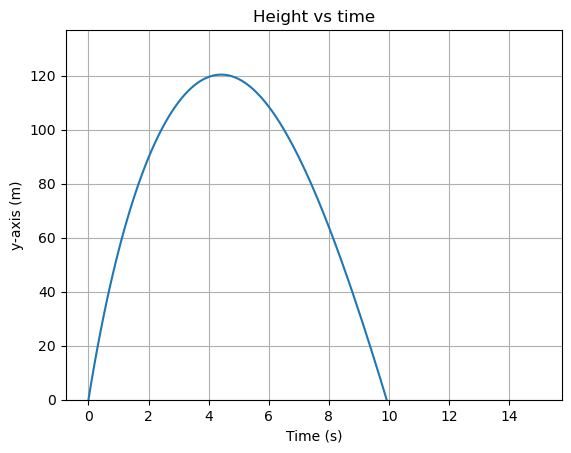

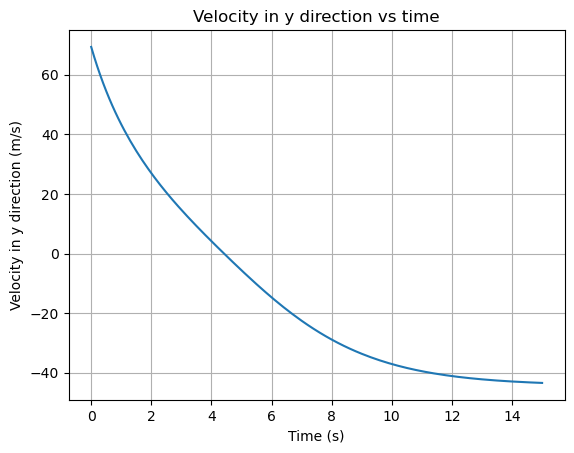

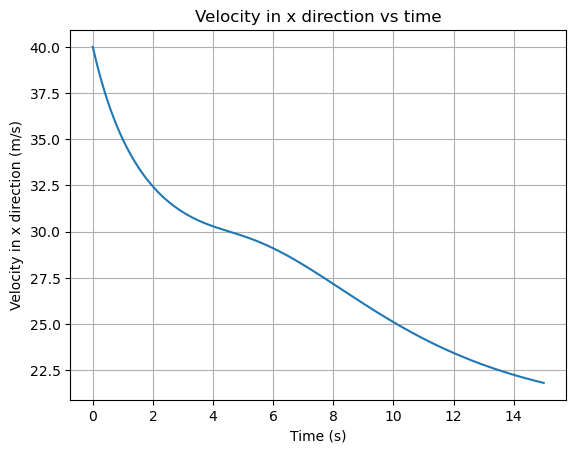

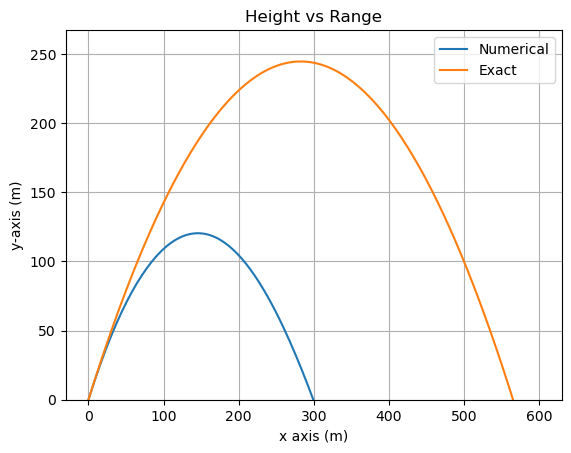

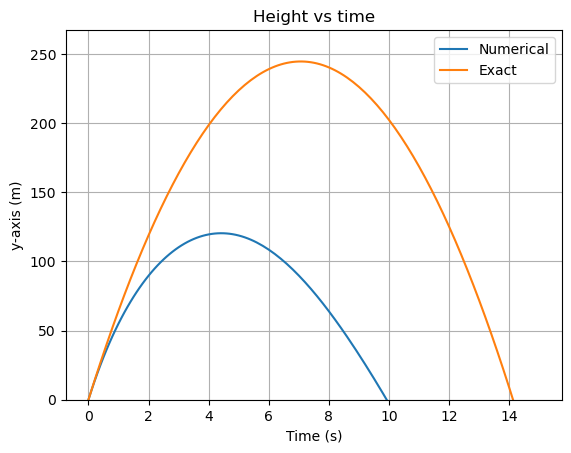

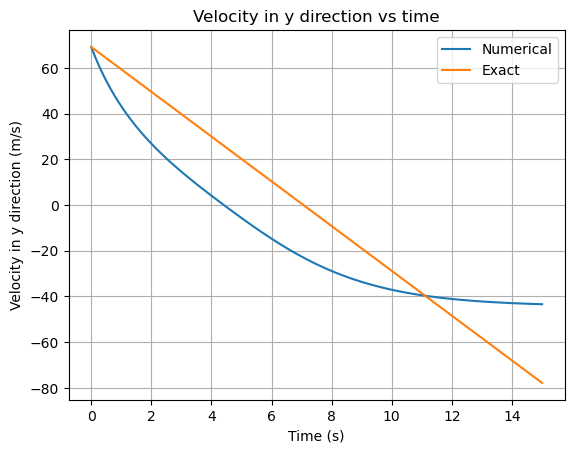

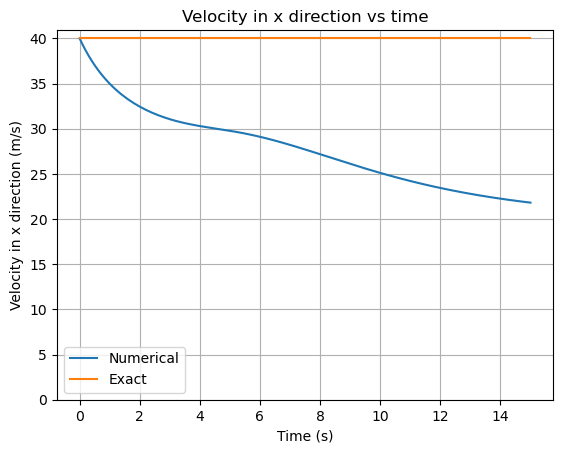

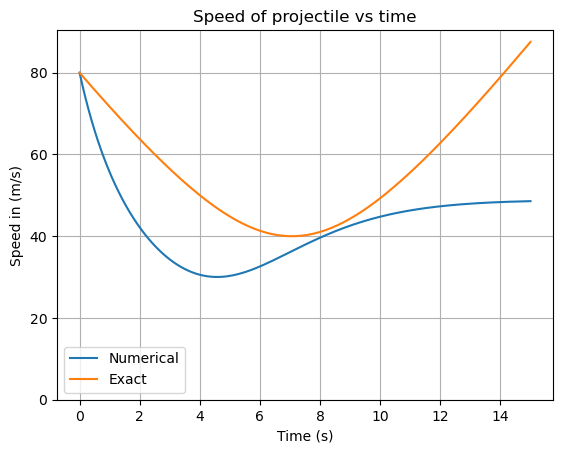

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

#  The numerical framework for solving general ODE systems is adopted from the book    
#  Jaan Kiusalaas, 2013, Numerical Methods in Engineering. Used in the course MAF310
# Chapter 7, page 246 -267


def main():
    
    t=0.0      # Starting time for simulation (sec)
    tend = 15  # End of simulation time (sec). Must be increased if projectile has not reached the ground.
    v0 = 80  # initial speed m/s
    ang = 60 # Initial direction, Angle with the horizontal (degrees)
    
 
    
    ang = ang*math.pi/180  # Converted to radians 
    
    
    y=np.array([0,v0*math.sin(ang),0,v0*math.cos(ang)])  # Initial conditions where the vx and vy are defined (her setter vi initialbetingelser)
    # + initial position y(0),x(0)
    dt =0.1  # Timestep
    T,Y=integrate_rungk4(F,t,y,tend,dt)  # Integrates forward using Runge Kutta 4th order in time! (Y en først her gir visst de 4 del yene fra tavlen, vi får 4 kolonner)
    #T,Y=integrate_euler(F,t,y,tend,dt)
    
#  print(T,Y)

    T1,Y1=exact_solution(v0,ang,y,t,tend,dt) # løsning uten wind og drag (trenger ikke denne visst)
    
#   print(T1,Y1)

    printSoln(T,Y,1) # Skriver visst ut de 4 y kolonnenene
    
    flighttime,distance=findRange(T,Y)
    print(f'Time of flight: {flighttime:12.3f} s')
    print("The range is: ",format(distance,'12.2f'), 'm')
    
    
    plt.plot(Y[:,2],Y[:,0])
    plt.grid(True)
    plt.xlabel('x axis (m)')
    plt.ylabel('y-axis (m)')
    plt.ylim(ymin=0)
    plt.title('Height vs Range')
    plt.show()
    
    
    plt.plot(T,Y[:,0])
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('y-axis (m)')
    plt.ylim(ymin=0)
    plt.title('Height vs time')
    plt.show()
    
    plt.plot(T,Y[:,1])
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity in y direction (m/s)')
    plt.title('Velocity in y direction vs time')
    plt.show() 
    
    plt.plot(T,Y[:,3])
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity in x direction (m/s)')
   # plt.ylim(ymin=0)
    plt.title('Velocity in x direction vs time')
    plt.show()  

    
    
    # Here comes comparison plot with the exact solution

    plt.plot(Y[:,2],Y[:,0],Y1[:,2],Y1[:,0])
    plt.grid(True)
    plt.xlabel('x axis (m)')
    plt.ylabel('y-axis (m)')
    plt.ylim(ymin=0)
    plt.title('Height vs Range')
    plt.legend(['Numerical','Exact'])
    plt.show()
    
    
    plt.plot(T,Y[:,0],T1,Y1[:,0])
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('y-axis (m)')
    plt.ylim(ymin=0)
    plt.title('Height vs time')
    plt.legend(['Numerical','Exact'])
    plt.show()
    
    
    plt.plot(T,Y[:,1],T1,Y1[:,1])
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity in y direction (m/s)')
    plt.title('Velocity in y direction vs time')
    plt.legend(['Numerical','Exact'])
    plt.show() 
    
    plt.plot(T,Y[:,3],T1,Y1[:,3])
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity in x direction (m/s)')
    plt.ylim(ymin=0)
    plt.title('Velocity in x direction vs time')
    plt.legend(['Numerical','Exact'])
    plt.show() 
    
        
    plt.plot(T,(Y[:,3]**2+Y[:,1]**2)**0.5,T1,(Y1[:,3]**2+Y1[:,1]**2)**0.5)
    plt.grid(True)
    plt.xlabel('Time (s)')
    plt.ylabel('Speed in (m/s)')
    plt.ylim(ymin=0)
    plt.title('Speed of projectile vs time')
    plt.legend(['Numerical','Exact'])
    plt.show()  
    
    
    
def exact_solution(v0,ang,y,t,tend,dt):
    
    # Denne beregner den eksakte løsningen der vi ikke har drag eller vind. 
    # Kun for sammenligning
    
    T=[]
    Y=[]
    
    T.append(t)
    Y.append(y)


    g=9.81
    
    y=np.zeros(4)
    while(t<tend):
        dt=min(dt,tend-t)
        t=t+dt
        y = y+0; ## NB! Denne var viktig for å få det hele til å fungere.
        # Uten denne så virker det som bare den siste verdien blir lagret
        # i arrayen til slutt. Må ha med det spesielle i Python hvordan 
        # lister/arrays skal kopieres i Python
        
        y[0]=v0*math.sin(ang)*t-0.5*g*t**2
        y[1]=v0*math.sin(ang)-g*t
        y[2]=v0*math.cos(ang)*t
        y[3]=v0*math.cos(ang)
        T.append(t)
        Y.append(y)
          
    return np.array(T),np.array(Y)

    
    
    
def integrate_euler(F,t,y,tend,dt):
    T=[]
    Y=[]
    T.append(t)
    Y.append(y)
    
    while(t<tend):
        dt=min(dt,tend-t)
        y=y+dt*F(t,y)
        t=t+dt
        T.append(t)
        Y.append(y)
    return np.array(T),np.array(Y)


def integrate_rungk4(F,t,y,tend,dt):
    
    # a general function that applies 4th order RungeKutta
    
    T=[]
    Y=[]
    T.append(t)
    Y.append(y)
    
    while t<tend:
        dt=min(dt,tend-t)
        y=y + run_kut4(F,t,y,dt)
        t=t+dt
        T.append(t)
        Y.append(y)
    return np.array(T),np.array(Y)


def run_kut4(F,x,y,h):
  #  4th order Runge Kutta Method 
  # Do not have to change this
    K0=h*F(x,y)
    K1=h*F(x+0.5*h,y+0.5*K0)
    K2=h*F(x+0.5*h,y+0.5*K1)
    K3=h*F(x+h,y+K2)
    
    return (K0+2*K1+2*K2+K3)/6.0


def F(t,y):
    # This is the function that must be changed when switching between different ordinary differential equations 

 
    Cd=0.01
    m=2
    g=9.81
    w = 20  # wind m/s. w is positiv if there is tailwind (medvind). Negative if headwind (motvind)
    
    
    F=np.zeros(4)
       
     #  Air drag proportional to v^2 + wind
    F[0]=y[1]
    F[1]=-Cd/m*y[1]*((y[1]**2+(y[3]-w)**2)**0.5)-g
    F[2]=y[3]
    F[3]=-Cd/m*(y[3]-w)*((y[1]**2+(y[3]-w)**2)**0.5)
    
    return F


def findRange(T,Y):
    
    # This function finds the range and the flighttime!
     
    last = len(Y[:,0])
    
    if(Y[last-1,0])>=0:
        print('Projectile has not reached ground, Increase end simulation time')  
        return 0,0 
    
    else:
        indeks = 0
    
        while Y[indeks,0]>=0:
            save = Y[indeks,0] 
            indeks = indeks +1
    
        # Use interpolation here to find the exact time.
    
        slope = (Y[indeks,0]-Y[indeks-1,0])/(T[indeks]-T[indeks-1])
        Timpact = T[indeks-1]-Y[indeks-1,0]/slope    
    
        xint=(Timpact-T[indeks-1])/(T[indeks]-T[indeks-1])
  
        Range = (1-xint)*Y[indeks-1,2]+xint*Y[indeks,2]
    
        return Timpact,Range 
    



def printSoln(X,Y,freq):
    m=len(Y)
    
    try: n=len(Y[0])
    except Typeerror: n=1
    
    if freq==0:
        freq=m
    printHead(n)
    
    for i in range(0,m,freq):
        printLine(X[i],Y[i],n)

def printHead(n):
    print("\n    T ",end=" ")
    for i in range(n):
        print("     y[",i,"]  ",end=" ")
    
    print()
    
def printLine(x,y,n):
    print(format(x,'13.4e'),end=" ")
    for i in range(n):
        print(format(y[i],'13.4e'),end=" ")
    print()    
    
main()    
    